In [31]:
import config

import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import numpy as np
import figure_utils
cohort = "Poyet"


In [137]:
pass_ = 0
all_ = 0
for host in ["am","ao","an","ae"]:
    df = pd.read_csv("%s/chisq/%s/%s_strain_chisq_test_cross.txt" % (config.analysis_directory,cohort,host),header=None,index_col=0)
    pass_ +=(df[1] > .05).sum()
    all_ += df[1].shape[0]

In [142]:
host = "an"
df = pd.read_csv("%s/chisq/%s/%s_strain_chisq_test_cross.txt" % (config.analysis_directory,cohort,host),header=None,index_col=0)
df_species = pd.read_csv("%s/chisq/%s/%s_species_chisq_test.txt" % (config.analysis_directory,cohort,host),header=None,index_col=0)

In [143]:
df

,1
0,
Bacteroides_clarus_62282_A,1.261116e-03
Bacteroides_massiliensis_44749_A,6.114221e-11
Bacteroides_uniformis_57318_A,2.869884e-01
Bacteroides_uniformis_57318_B,2.682367e-03
Bacteroides_vulgatus_57955_A,5.290913e-04
Bacteroides_vulgatus_57955_B,1.625722e-01
Bacteroides_vulgatus_57955_C,5.005885e-01
Bacteroides_xylanisolvens_57185_A,5.813012e-02
Barnesiella_intestinihominis_62208_A,7.128718e-02


In [144]:
df_species

,1
0,
Alistipes_putredinis_61533,1.735781e-01
Bacteroides_clarus_62282,1.261116e-03
Bacteroides_massiliensis_44749,6.114221e-11
Bacteroides_uniformis_57318,5.754595e-01
Bacteroides_vulgatus_57955,2.947227e-01
Bacteroides_xylanisolvens_57185,5.813012e-02
Barnesiella_intestinihominis_62208,7.128718e-02
Eubacterium_rectale_56927,3.400437e-02
Paraprevotella_clara_33712,3.421500e-01


In [145]:
df_species = df_species.squeeze()
df_species.index = [[figure_utils.get_pretty_species_name(d) for d in df_species.index]]

In [146]:
#s = [d[0] for d in df_species.index]

#df_species.index = s

In [147]:
species_names = [figure_utils.get_pretty_species_name(d[:-2]) for d in df.index]
df["species"] = species_names

In [148]:
(df[1] > .05).mean()

0.7333333333333333

In [149]:
pass_/all_

0.7833333333333333

In [150]:
df_gb = df.groupby("species")

In [151]:
df_strain_species = {}
for species in df_gb.groups:
    df_strain_species[species] = df_gb.get_group(species)[1].values
    a=df_strain_species[species]
    df_strain_species[species] = np.pad(a, (0,3 - len(df_strain_species[species])), mode='constant',constant_values=(np.nan,))

In [152]:
cmap = plt.get_cmap('RdBu', 10)
cmap.set_under("red")
cmap.set_over("blue")

In [153]:
df_strain_species = pd.DataFrame(df_strain_species).T

In [154]:
df_strain_species.columns = ["Strain A","Strain B", "Strain C"]

In [155]:
df_species

Alistipes putredinis            1.735781e-01
Bacteroides clarus              1.261116e-03
Bacteroides massiliensis        6.114221e-11
Bacteroides uniformis           5.754595e-01
Bacteroides vulgatus            2.947227e-01
Bacteroides xylanisolvens       5.813012e-02
Barnesiella intestinihominis    7.128718e-02
Eubacterium rectale             3.400437e-02
Paraprevotella clara            3.421500e-01
Ruminococcus bromii             2.650259e-01
Sutterella wadsworthensis       3.000874e-01
Name: 1, dtype: float64

In [156]:
df_strain_species.shape

(10, 3)

In [157]:
df_strain_species["Species"] = np.nan

In [158]:
for ind in df_strain_species.index:
    print(ind)
    df_strain_species.loc[ind,"Species"] = df_species.loc[ind][0]

Bacteroides clarus
Bacteroides massiliensis
Bacteroides uniformis
Bacteroides vulgatus
Bacteroides xylanisolvens
Barnesiella intestinihominis
Eubacterium rectale
Paraprevotella clara
Ruminococcus bromii
Sutterella wadsworthensis


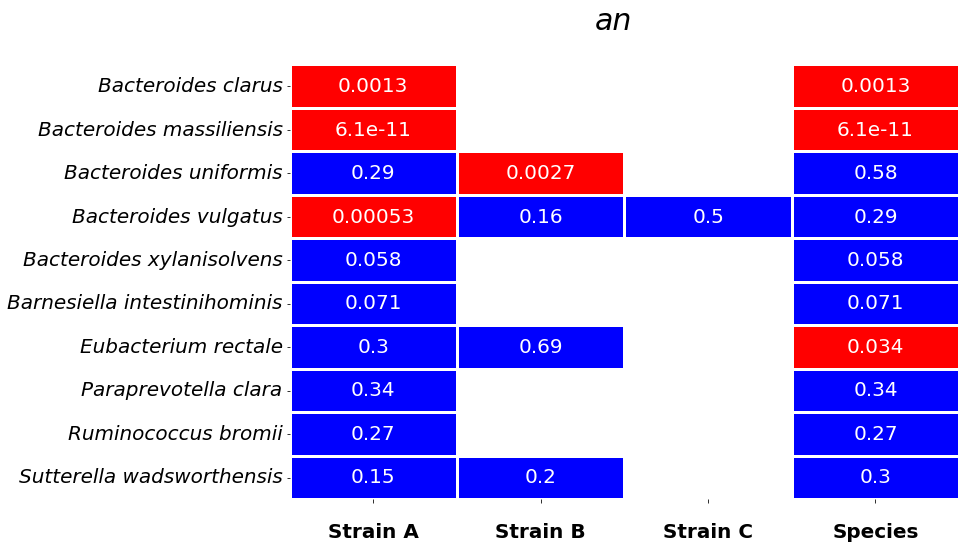

In [159]:
fig,ax = plt.subplots(figsize=(12,8))

sns.heatmap(df_strain_species, ax=ax,cmap=cmap,vmin=0.05,vmax=.050001,
            linewidths=3,linecolor="white",cbar=None,annot=True,annot_kws={"fontsize":20,"color":"white"});

fig.suptitle(host,size=30, fontstyle='italic')

from matplotlib import rc,rcParams
ax.tick_params(axis='x', which='major', labelsize=20,rotation=0,pad=20)
ax.tick_params(axis='y', which='major', labelsize=20)

ax.set_yticklabels(ax.get_yticklabels(), fontstyle='italic');
ax.set_xticklabels(ax.get_xticklabels(), fontweight="bold");